# 분석

In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 다운받은 csv를 pandas의 DataFrame 형식으로 불러옵니다.
data = pd.read_csv('train.csv')

# id 는 제외하고 분석합니다.
data = data.drop('id', axis=1)

In [4]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(data)

결측치가 존재하지 않습니다


In [5]:
numeric_feature = data.columns[(data.dtypes==int) | (data.dtypes== float)]
categorical_feature = data.columns[data.dtypes=='O']

print("수치형 데이터는 다음과 같습니다. \n", list(numeric_feature))
print("카테고리형 데이터는 다음과 같습니다. \n", list(categorical_feature))

수치형 데이터는 다음과 같습니다. 
 ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'target']
카테고리형 데이터는 다음과 같습니다. 
 ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']


In [6]:
from sklearn.preprocessing import LabelEncoder

corr_df = data.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

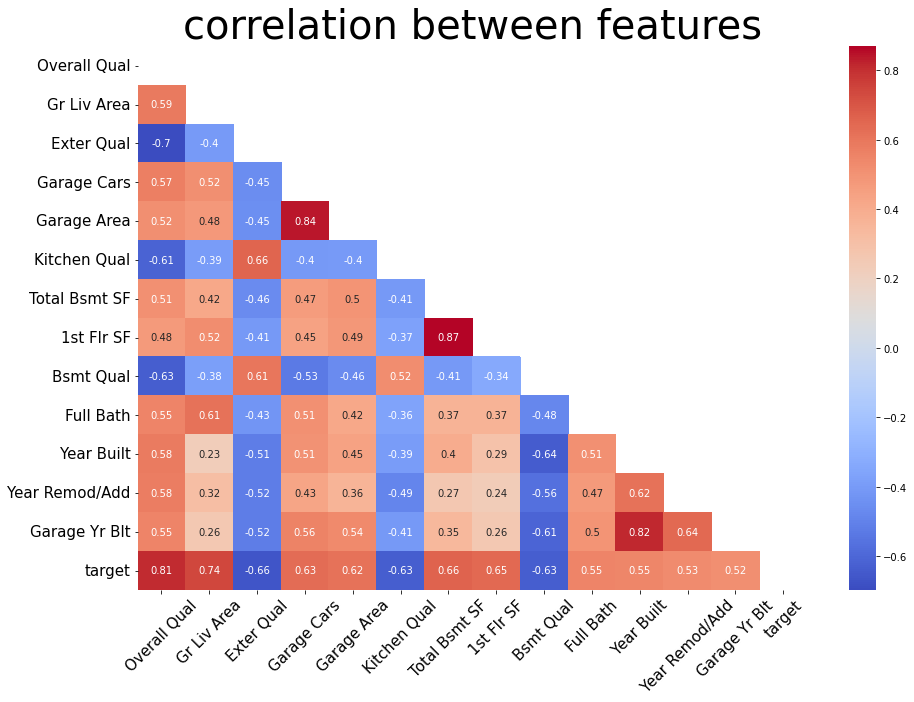

In [7]:
#상관관계 분석도
plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

In [9]:
data.isnull().sum()

Overall Qual      0
Gr Liv Area       0
Exter Qual        0
Garage Cars       0
Garage Area       0
Kitchen Qual      0
Total Bsmt SF     0
1st Flr SF        0
Bsmt Qual         0
Full Bath         0
Year Built        0
Year Remod/Add    0
Garage Yr Blt     0
target            0
dtype: int64

In [50]:
corr_order = data.corr().loc[:'Garage Yr Blt', 'target'].abs().sort_values(ascending=False)
corr_order


Overall Qual      0.810607
Gr Liv Area       0.742061
Total Bsmt SF     0.664047
1st Flr SF        0.646843
Garage Cars       0.634497
Garage Area       0.617151
Full Bath         0.554453
Year Built        0.546037
Year Remod/Add    0.529477
Garage Yr Blt     0.517973
Name: target, dtype: float64

# 단순 선형 방정식

In [15]:
train = pd.read_csv('train.csv')

x_feature = 'Gr Liv Area'
y_feature = 'target'

X = train[x_feature]
Y = train[y_feature]

X

0       2392
1       1352
2        900
3       1174
4       1958
        ... 
1345    1756
1346    2748
1347    1214
1348     894
1349     907
Name: Gr Liv Area, Length: 1350, dtype: int64

In [16]:

# 각각의 평균을 구합니다.
X_mean = np.mean(X)
Y_mean = np.mean(Y)

# 평균값을 이용하여 관계를 구합니다.
relation = Y_mean/X_mean

print(f"{x_feature}의 평균:{X_mean:.2f} \n{y_feature}의 평균:{Y_mean:.2f}")
print(f"따라서 {y_feature}는 {x_feature}의 평균 {relation:.2f}배 입니다.")
print(f"즉, a = {relation:.2f} 입니다.")
a = round(relation, 2)
print(f"업데이트 된 방정식 : Y = {a:.2f} * X + b")


Gr Liv Area의 평균:1513.54 
target의 평균:186406.31
따라서 target는 Gr Liv Area의 평균 123.16배 입니다.
즉, a = 123.16 입니다.
업데이트 된 방정식 : Y = 123.16 * X + b


In [17]:
# b = Y - a * X 를 그대로 작성합니다. 여기서도 평균값을 이용합니다.
b = Y_mean - a * X_mean

print(f"b는 {b:.2f} 입니다.")
print(f"업데이트 된 방정식 : Y = {a:.2f} * X + {b:.2f}")

b는 -1.55 입니다.
업데이트 된 방정식 : Y = 123.16 * X + -1.55


In [18]:
predict_Y = a * X + b
predict_Y

0       294597.172504
1       166510.772504
2       110842.452504
3       144588.292504
4       241145.732504
            ...      
1345    216267.412504
1346    338442.132504
1347    149514.692504
1348    110103.492504
1349    111704.572504
Name: Gr Liv Area, Length: 1350, dtype: float64

In [19]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [20]:
real_answer = Y.copy()

# 정답과 예측 값을 함수에 넣어 결과를 확인합니다.
error = NMAE(real_answer, predict_Y)

print(f"이 방정식의 평균 에러는 {error:.2f} 입니다.")

이 방정식의 평균 에러는 0.20 입니다.


In [22]:
test = pd.read_csv('test.csv')

In [23]:
# 예측의 재료를 가져옵니다.
test_X = test[x_feature]

# 예측을 진행합니다.
predict_test = a * test_X + b

# 예측 결과를 확인합니다.
predict_test

0       221686.452504
1       133257.572504
2       193729.132504
3       300878.332504
4       128084.852504
            ...      
1345    237943.572504
1346    112320.372504
1347    106039.212504
1348    176117.252504
1349    287823.372504
Name: Gr Liv Area, Length: 1350, dtype: float64

In [24]:
submission = pd.read_csv('sample_submission.csv')
submission.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [25]:
submission[y_feature] = predict_test

# 데이터가 잘 들어갔는지 확인합니다.
submission

,id,target
0,1,221686.452504
1,2,133257.572504
2,3,193729.132504
3,4,300878.332504
4,5,128084.852504
...,...,...
1345,1346,237943.572504
1346,1347,112320.372504
1347,1348,106039.212504
1348,1349,176117.252504


In [27]:
submission.to_csv("submission.csv", index=False)
submission

,id,target
0,1,221686.452504
1,2,133257.572504
2,3,193729.132504
3,4,300878.332504
4,5,128084.852504
...,...,...
1345,1346,237943.572504
1346,1347,112320.372504
1347,1348,106039.212504
1348,1349,176117.252504


# XGboost

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [53]:
cancer = pd.DataFrame(data, columns = data.columns)
cancer.head()

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [54]:
cancer['target'].value_counts()

155000    15
140000    14
145000    13
170000    12
135000    12
          ..
126175     1
369900     1
374000     1
224500     1
256000     1
Name: target, Length: 619, dtype: int64

In [82]:
from sklearn.preprocessing import LabelEncoder

corr_df = data
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)
data

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,0,3,968,0,2392,2392,0,2,2003,2003,2003,386250
1,7,1352,2,2,466,2,1352,1352,0,2,2006,2007,2006,194000
2,5,900,3,1,288,3,864,900,4,1,1967,1967,1967,123000
3,5,1174,3,2,576,2,680,680,4,1,1900,2006,2000,135000
4,7,1958,2,3,936,2,1026,1026,2,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,6,1756,2,2,422,3,872,888,0,2,1996,1997,1996,204000
1346,9,2748,2,3,850,0,1850,1850,0,2,2006,2006,2006,390000
1347,5,1214,3,1,318,3,1214,1214,4,2,1967,1967,1967,143000
1348,5,894,3,2,440,3,864,894,2,1,1974,1974,1974,131000


In [145]:
y = cancer['target']
X = cancer.drop('target',axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)
print(X_train.shape, X_test.shape)

(1080, 13) (270, 13)


In [146]:
xgb = XGBClassifier(n_estimators=500, learning_rate = 0.1, max_depth = 4)
xgb.fit(X_train, y_train)

XGBClassifier(max_depth=4, n_estimators=500, objective='multi:softprob')

In [147]:
print(xgb.score(X_train, y_train))

0.8638888888888889


In [85]:
test = pd.read_csv('test.csv')
corr_df = test
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)
test

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,1,9,1800,2,2,702,0,1800,1800,0,2,2007,2007,2007
1,2,6,1082,3,1,240,4,1082,1082,4,1,1948,1950,1948
2,3,6,1573,2,2,440,2,756,769,2,2,2000,2000,2000
3,4,6,2443,2,3,744,2,1158,1158,2,2,2004,2004,2004
4,5,5,1040,3,2,686,4,1040,1040,4,1,1968,1968,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1346,8,1932,0,3,774,0,1932,1932,0,2,2008,2008,2008
1346,1347,5,912,3,1,288,4,912,912,4,1,1964,1964,1964
1347,1348,4,861,3,2,288,4,861,861,1,1,1920,1950,1920
1348,1349,5,1430,3,2,624,2,1430,1430,0,2,2004,2005,2004


In [87]:
test = test.drop('id', axis=1)

xgb_pred = xgb.predict(test)
xgb_pred 

array([325000, 125000, 180000, ...,  80000, 196000, 202500])

In [88]:
submission = pd.read_csv('sample_submission.csv')
submission.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [89]:
submission[y_feature] = xgb_pred
# 데이터가 잘 들어갔는지 확인합니다.
submission

,id,target
0,1,325000
1,2,125000
2,3,180000
3,4,325300
4,5,129500
...,...,...
1345,1346,360000
1346,1347,116000
1347,1348,80000
1348,1349,196000


In [91]:
submission.to_csv("submission2.csv", index=False)
submission

,id,target
0,1,325000
1,2,125000
2,3,180000
3,4,325300
4,5,129500
...,...,...
1345,1346,360000
1346,1347,116000
1347,1348,80000
1348,1349,196000


# 다중 선형 회귀
참고 블로그 - https://kimdingko-world.tistory.com/103

In [96]:
# 다운받은 csv를 pandas의 DataFrame 형식으로 불러옵니다.
data = pd.read_csv('train.csv')

# id 는 제외하고 분석합니다.
data = data.drop('id', axis=1)
data

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,6,1756,Gd,2,422,TA,872,888,Ex,2,1996,1997,1996,204000
1346,9,2748,Gd,3,850,Ex,1850,1850,Ex,2,2006,2006,2006,390000
1347,5,1214,TA,1,318,TA,1214,1214,TA,2,1967,1967,1967,143000
1348,5,894,TA,2,440,TA,864,894,Gd,1,1974,1974,1974,131000


In [99]:
corr_df = data
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)
data

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,0,3,968,0,2392,2392,0,2,2003,2003,2003,386250
1,7,1352,2,2,466,2,1352,1352,0,2,2006,2007,2006,194000
2,5,900,3,1,288,3,864,900,4,1,1967,1967,1967,123000
3,5,1174,3,2,576,2,680,680,4,1,1900,2006,2000,135000
4,7,1958,2,3,936,2,1026,1026,2,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,6,1756,2,2,422,3,872,888,0,2,1996,1997,1996,204000
1346,9,2748,2,3,850,0,1850,1850,0,2,2006,2006,2006,390000
1347,5,1214,3,1,318,3,1214,1214,4,2,1967,1967,1967,143000
1348,5,894,3,2,440,3,864,894,2,1,1974,1974,1974,131000


In [100]:
# 타겟값을 기준으로 관계가 높은 다른 특성들을 정렬해서 역순으로 나열해봅시다.
corr = data.corr()
corr["target"].sort_values(ascending=False)
# 음수는 범주형 데이터임

target            1.000000
Overall Qual      0.810607
Gr Liv Area       0.742061
Total Bsmt SF     0.664047
1st Flr SF        0.646843
Garage Cars       0.634497
Garage Area       0.617151
Full Bath         0.554453
Year Built        0.546037
Year Remod/Add    0.529477
Garage Yr Blt     0.517973
Kitchen Qual     -0.633523
Bsmt Qual        -0.634945
Exter Qual       -0.663732
Name: target, dtype: float64

In [126]:
from sklearn.model_selection import train_test_split

x = data[['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Cars', 'Garage Area', 'Kitchen Qual', 'Exter Qual', 'Bsmt Qual'
          ]]
y = data[['target']]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3)

In [127]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

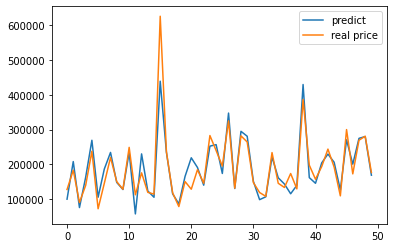

In [128]:
plt.plot(mlr.predict(x_test[:50]), label="predict")
plt.plot(y_test[:50].values.reshape(-1, 1), label="real price")
plt.legend()
# 올 대충 맞는데?
# 이상치가 있다. 10~20사이, 저 부분 너무 거슬린다

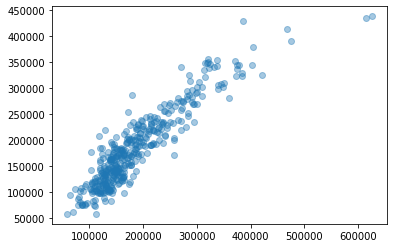

In [129]:
y_predict = mlr.predict(x_test)

plt.scatter(y_test, y_predict, alpha = 0.4)
plt.show()

In [130]:
print(mlr.score(x_train, y_train))

0.8537057785729735


In [138]:
test = pd.read_csv('test.csv')
test = test.drop('id', axis=1)
corr_df = test
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)
test = test[['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Cars', 'Garage Area', 'Kitchen Qual', 'Exter Qual', 'Bsmt Qual'
          ]]
test

,Overall Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Cars,Garage Area,Kitchen Qual,Exter Qual,Bsmt Qual
0,9,1800,1800,1800,2,702,0,2,0
1,6,1082,1082,1082,1,240,4,3,4
2,6,1573,756,769,2,440,2,2,2
3,6,2443,1158,1158,3,744,2,2,2
4,5,1040,1040,1040,2,686,4,3,4
...,...,...,...,...,...,...,...,...,...
1345,8,1932,1932,1932,3,774,0,0,0
1346,5,912,912,912,1,288,4,3,4
1347,4,861,861,861,2,288,4,3,1
1348,5,1430,1430,1430,2,624,2,3,0


In [139]:
mlr_predict = mlr.predict(test)

In [141]:
submission = pd.read_csv('sample_submission.csv')
submission[y_feature] = mlr_predict
# 데이터가 잘 들어갔는지 확인합니다.
submission.to_csv("submission3.csv", index=False)

## 수치형 데이터는 다음과 같습니다. 
 ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'target']
## 카테고리형 데이터는 다음과 같습니다. 
 ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']

In [148]:
data = pd.read_csv('train.csv')

# id 는 제외하고 분석합니다.
data = data.drop('id', axis=1)
corr_df = data
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)
x = data[['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt',
          'Exter Qual', 'Kitchen Qual', 'Bsmt Qual'
          ]]
y = data[['target']]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3)

mlr = LinearRegression()
mlr.fit(x_train, y_train)

print(mlr.score(x_train, y_train))

0.8653671637144811
